In [37]:
import tensorflow as tf  # Import TensorFlow library
from tensorflow.keras.datasets import mnist  # Import MNIST dataset from Keras
from tensorflow.keras.utils import to_categorical  # Import function for one-hot encoding of labels

# Load MNIST dataset and split into training and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train, x_test = x_train / 255, x_test / 255

# Reshape the images to a flat vector of size 28*28 (784) for each image
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# Convert the labels into one-hot encoded vectors (10 categories)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

import numpy as np  # Import NumPy library for numerical operations

# Initialize weights for the neural network (random values for the first layer)
w1 = np.random.randn(28 * 28, 128)  # Weights for the first layer (784 input nodes, 128 hidden nodes)
b1 = np.zeros((1, 128))  # Bias for the first layer (128 hidden nodes)

# Initialize weights for the second layer (128 hidden nodes, 10 output nodes)
w2 = np.random.randn(128, 10)  # Weights for the second layer (128 hidden nodes, 10 output nodes)
b2 = np.zeros((1, 10))  # Bias for the second layer (10 output nodes)

epochs = 400  # Set the number of training epochs (iterations)
for epoch in range(epochs):  # Loop through each epoch
    # Forward pass for the first layer (linear transformation + activation function)
    z1 = x_train @ w1 + b1  # Linear combination of input and weights, plus bias
    z1 = np.maximum(0, z1)  # ReLU activation function (set all negative values to 0)

    # Forward pass for the second layer (linear transformation)
    z2 = z1 @ w2 + b2  # Linear combination of hidden layer output and second layer weights, plus bias

    # Softmax function to calculate probabilities for each class
    y_pred = np.exp(z2) / np.sum(np.exp(z2), axis=1, keepdims=True)  # Softmax activation

    # Compute the loss (cross-entropy loss)
    loss = -np.sum(y_train * np.log(y_pred)) / y_train.shape[0]  # Compute the average cross-entropy loss

    # Backpropagation to compute gradients (error propagation from output to input)
    dz2 = y_pred - y_train  # Gradient of loss with respect to z2
    dw2 = np.dot(z1.T, dz2) / y_train.shape[0]  # Gradient of loss with respect to w2
    db2 = np.sum(dz2, axis=0, keepdims=True) / y_train.shape[0]  # Gradient of loss with respect to b2

    # Backpropagation to the first layer
    dz1 = np.dot(dz2, w2.T) * (z1 > 0)  # Gradient of loss with respect to z1 (ReLU derivative)
    dw1 = np.dot(x_train.T, dz1) / x_train.shape[0]  # Gradient of loss with respect to w1
    db1 = np.sum(dz1, axis=0, keepdims=True) / x_train.shape[0]  # Gradient of loss with respect to b1

    learning_rate = 0.2  # Set the learning rate (step size for gradient descent)

    # Update the weights and biases using gradient descent
    w1 -= learning_rate * dw1  # Update weights for the first layer
    b1 -= learning_rate * db1  # Update biases for the first layer
    w2 -= learning_rate * dw2  # Update weights for the second layer
    b2 -= learning_rate * db2  # Update biases for the second layer

    # Print the loss and accuracy every 10 epochs
    if epoch % 10 == 0:
        y_pred_labels = np.argmax(y_pred, axis=1)  # Get predicted labels by choosing the max probability
        y_true_labels = np.argmax(y_train, axis=1)  # Get true labels (original labels)
        accuracy = np.mean(y_pred_labels == y_true_labels)  # Calculate accuracy
        print(f"Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")  # Print epoch info


Epoch 0, Loss: 143.4504, Accuracy: 0.1300


D:\anaconda\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in multiply


Epoch 10, Loss: 12.0272, Accuracy: 0.6194
Epoch 20, Loss: 7.9823, Accuracy: 0.7107
Epoch 30, Loss: 6.3898, Accuracy: 0.7513
Epoch 40, Loss: 5.4508, Accuracy: 0.7746
Epoch 50, Loss: 4.8079, Accuracy: 0.7905
Epoch 60, Loss: 4.3304, Accuracy: 0.8030
Epoch 70, Loss: 3.9562, Accuracy: 0.8125
Epoch 80, Loss: 3.6526, Accuracy: 0.8206
Epoch 90, Loss: 3.3994, Accuracy: 0.8263
Epoch 100, Loss: 3.1842, Accuracy: 0.8320
Epoch 110, Loss: 2.9984, Accuracy: 0.8363
Epoch 120, Loss: 2.8357, Accuracy: 0.8408
Epoch 130, Loss: 2.6912, Accuracy: 0.8442
Epoch 140, Loss: 2.5626, Accuracy: 0.8471
Epoch 150, Loss: 2.4472, Accuracy: 0.8497
Epoch 160, Loss: 2.3424, Accuracy: 0.8527
Epoch 170, Loss: 2.2469, Accuracy: 0.8554
Epoch 180, Loss: 2.1595, Accuracy: 0.8579
Epoch 190, Loss: 2.0793, Accuracy: 0.8600
Epoch 200, Loss: 2.0055, Accuracy: 0.8620
Epoch 210, Loss: 1.9371, Accuracy: 0.8638
Epoch 220, Loss: 1.8733, Accuracy: 0.8658
Epoch 230, Loss: 1.8137, Accuracy: 0.8672
Epoch 240, Loss: 1.7578, Accuracy: 0.8684


4
10000


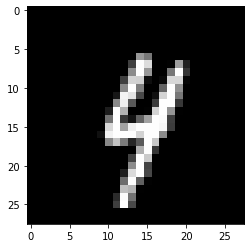

In [38]:
import matplotlib.pyplot as plt
sample = x_test[760].reshape(1, -1)  
z1 = sample @ w1 + b1
z1 = np.maximum(0, z1)  # ReLU
z2 = z1 @ w2 + b2
y_pred = np.exp(z2) / np.sum(np.exp(z2), axis=1, keepdims=True)
predicted_label = np.argmax(y_pred)
print(predicted_label)
plt.imshow(x_test[760].reshape(28, 28), cmap='gray')
print(x_test.shape[0])